# **Breast Cancer Data Set**
## BAN210 - Final Assessment (Individual)
#### Name: **Abdullah Thowzif Hameed**
#### Student ID: **119169217**

**Loading Dependencies**

In [1064]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**Loading Dataset**

In [1061]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/SENECA/BAN210/Module 13: Final Assessment/breast-cancer.csv')
df.columns= df.columns.str.lower()
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


**Data Cleaning and Standardization**

In [1065]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [1066]:
df.shape

(286, 10)

The Dataset have 286 Observations with 10 Features.

* Converting data types of categorical varible to Category from Object

In [1067]:
df['node-caps'].value_counts()

no     222
yes     56
?        8
Name: node-caps, dtype: int64

* We have 8 Missing values represented by "?" we shall be dropping such observation and not replace it with any value as the data might become inaccurate.

In [1068]:
df["breast-quad"].value_counts()

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64

In [1069]:
df.drop(df.loc[df["node-caps"] == "?", "node-caps"].index, axis=0,inplace=True)

In [1070]:
df.drop(df.loc[df["breast-quad"] == "?", "breast-quad"].index, axis=0,inplace=True)

In [1071]:
df['class'] = df['class'].astype('category')
df['menopause'] = df['menopause'].astype('category')
df['deg-malig'] = df['deg-malig'].astype('category')
df['node-caps'] = df['node-caps'].astype('category')
df['breast'] = df['breast'].astype('category')
df['breast-quad'] = df['breast-quad'].astype('category')
df['irradiat'] = df['irradiat'].astype('category')

In [1072]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        277 non-null    category
 1   age          277 non-null    object  
 2   menopause    277 non-null    category
 3   tumor-size   277 non-null    object  
 4   inv-nodes    277 non-null    object  
 5   node-caps    277 non-null    category
 6   deg-malig    277 non-null    category
 7   breast       277 non-null    category
 8   breast-quad  277 non-null    category
 9   irradiat     277 non-null    category
dtypes: category(7), object(3)
memory usage: 11.5+ KB


After performing cleaning, we are left with 278 Observations.

**Checking Duplicate Values**

In [1073]:
df_duplicate = df[df.duplicated()]

In [1074]:
df_duplicate.count()

class          14
age            14
menopause      14
tumor-size     14
inv-nodes      14
node-caps      14
deg-malig      14
breast         14
breast-quad    14
irradiat       14
dtype: int64

* There are 14 duplicate observations observation. We will keep the first occurrence of the duplicate observation and drop the next occurring one.

In [1075]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [1076]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        263 non-null    category
 1   age          263 non-null    object  
 2   menopause    263 non-null    category
 3   tumor-size   263 non-null    object  
 4   inv-nodes    263 non-null    object  
 5   node-caps    263 non-null    category
 6   deg-malig    263 non-null    category
 7   breast       263 non-null    category
 8   breast-quad  263 non-null    category
 9   irradiat     263 non-null    category
dtypes: category(7), object(3)
memory usage: 11.0+ KB


* After dropping the duplicate observations, we are left with 264 observations. 

In [1077]:
df.head(10)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [1078]:
df.tail(10)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
275,recurrence-events,40-49,premeno,25-29,9-11,yes,3,right,left_up,no
276,recurrence-events,30-39,premeno,25-29,6-8,yes,3,left,right_low,yes
277,recurrence-events,60-69,ge40,10-14,6-8,yes,3,left,left_up,yes
278,recurrence-events,50-59,premeno,35-39,15-17,yes,3,right,right_up,no
279,recurrence-events,50-59,ge40,40-44,6-8,yes,3,left,left_low,yes
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
285,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


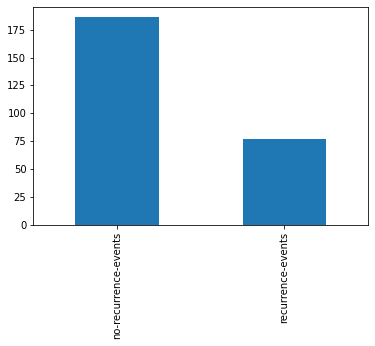

In [1079]:
df['class'].value_counts().plot(kind='bar')

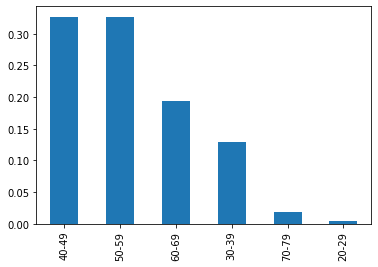

In [1080]:
df['age'].value_counts(sorted).plot(kind='bar')

In [1081]:
df['menopause'].value_counts()

premeno    142
ge40       116
lt40         5
Name: menopause, dtype: int64

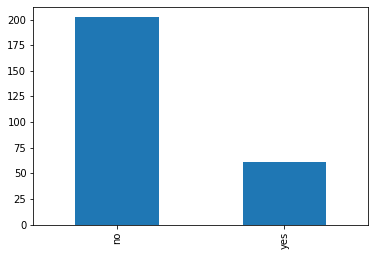

In [1139]:
df['irradiat'].value_counts().plot(kind='bar',)

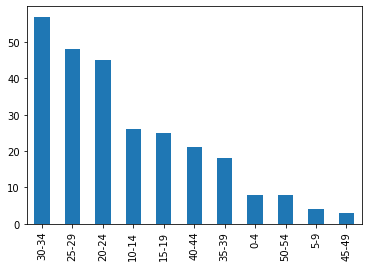

In [1083]:
df['tumor-size'].value_counts().plot(kind='bar',)

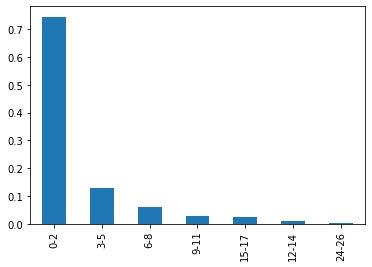

In [1084]:
df['inv-nodes'].value_counts(sorted).plot(kind='bar')

In [1085]:
df['deg-malig'].value_counts()

2    123
3     79
1     61
Name: deg-malig, dtype: int64

In [1086]:
df.loc[df["age"] == "40-49", "tumor-size"].value_counts()

20-24    20
30-34    20
25-29    16
10-14     7
35-39     7
15-19     5
40-44     5
0-4       2
50-54     2
5-9       1
45-49     1
Name: tumor-size, dtype: int64

In [1087]:
df.loc[df["age"] == "50-59", "tumor-size"].value_counts()

25-29    19
30-34    17
20-24    11
15-19     9
10-14     9
40-44     7
35-39     7
0-4       3
50-54     3
5-9       1
Name: tumor-size, dtype: int64

In [1088]:
df['breast'].value_counts()

left     136
right    127
Name: breast, dtype: int64

In [1089]:
df['breast-quad'].value_counts()

left_low     99
left_up      89
right_up     32
right_low    23
central      20
Name: breast-quad, dtype: int64

In [1090]:
df.drop(df.loc[df["breast-quad"] == "?", "breast-quad"].index, axis=0,inplace=True)

In [1091]:
df['irradiat'].value_counts()

no     202
yes     61
Name: irradiat, dtype: int64

In [1092]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        263 non-null    category
 1   age          263 non-null    object  
 2   menopause    263 non-null    category
 3   tumor-size   263 non-null    object  
 4   inv-nodes    263 non-null    object  
 5   node-caps    263 non-null    category
 6   deg-malig    263 non-null    category
 7   breast       263 non-null    category
 8   breast-quad  263 non-null    category
 9   irradiat     263 non-null    category
dtypes: category(7), object(3)
memory usage: 19.1+ KB


### Chi-Square Test

#### Hyphothesis Analysis

H0: The variables are not correlated with each other. 

In [1093]:
from scipy.stats import chi2_contingency

# Cross tabulation 
Crosstab_class_irradiat=pd.crosstab(index=df['class'],columns=df['irradiat'])
print(Crosstab_class_irradiat)

Crosstab_class_breast=pd.crosstab(index=df['class'],columns=df['breast'])
print(Crosstab_class_breast)

Crosstab_class_tumorSize=pd.crosstab(index=df['class'],columns=df['tumor-size'])
print(Crosstab_class_tumorSize)



Crosstab_breast_tumorSize=pd.crosstab(index=df['breast'],columns=df['deg-malig'])
print(Crosstab_breast_tumorSize)


Crosstab_breast_quad=pd.crosstab(index=df['breast'],columns=df['breast-quad'])
print(Crosstab_breast_quad)

Crosstab_breast_nodeCap=pd.crosstab(index=df['breast'],columns=df['node-caps'])
print(Crosstab_breast_nodeCap)


# Performing Chi-sq test
ChiSqResult_class_irradiat = chi2_contingency(Crosstab_class_irradiat)

ChiSqResult_class_breast = chi2_contingency(Crosstab_class_breast)

ChiSqResult_class_tumorSize = chi2_contingency(Crosstab_class_tumorSize)

ChiSqResult_breast_tumorSize = chi2_contingency(Crosstab_breast_tumorSize)

Crosstab_breast_nodeCap = chi2_contingency(Crosstab_breast_nodeCap)
 
    
    
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSqResult_class_irradiat Test is:', ChiSqResult_class_irradiat[1])

print('The P-Value of the ChiSqResult_class_breast Test is:', ChiSqResult_class_breast[1])

print('The P-Value of the ChiSqResult_class_tumorSize Test is:', ChiSqResult_class_tumorSize[1])

print('The P-Value of the ChiSqResult_breast_tumorSize Test is:', ChiSqResult_breast_tumorSize[1])

#print('The P-Value of the ChiSqResult_breast_quad Test is:', ChiSqResult_breast_quad[1])

irradiat               no  yes
class                         
no-recurrence-events  154   32
recurrence-events      48   29
breast                left  right
class                            
no-recurrence-events    94     92
recurrence-events       42     35
tumor-size            0-4  10-14  15-19  20-24  25-29  30-34  35-39  40-44  \
class                                                                        
no-recurrence-events    7     25     19     31     32     33     12     16   
recurrence-events       1      1      6     14     16     24      6      5   

tumor-size            45-49  5-9  50-54  
class                                    
no-recurrence-events      2    4      5  
recurrence-events         1    0      3  
deg-malig   1   2   3
breast               
left       31  61  44
right      30  62  35
breast-quad  central  left_low  left_up  right_low  right_up
breast                                                      
left              11        69       32         1

#### Conclusion,

For Class and irradiat:
    We failed to reject H0, the varible are not related to each other

For Class and breast:
    We reject H0, the varible are related to each other

For Class and tumorsize:
    We failed to reject H0, the varible are not related to each other
    
For Breast and tumorsize:
    We reject H0, the varible are related to each other
    
For Breast and Breast Quad:
    We reject H0, the varible are related to each other

In [1094]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        263 non-null    category
 1   age          263 non-null    object  
 2   menopause    263 non-null    category
 3   tumor-size   263 non-null    object  
 4   inv-nodes    263 non-null    object  
 5   node-caps    263 non-null    category
 6   deg-malig    263 non-null    category
 7   breast       263 non-null    category
 8   breast-quad  263 non-null    category
 9   irradiat     263 non-null    category
dtypes: category(7), object(3)
memory usage: 19.1+ KB


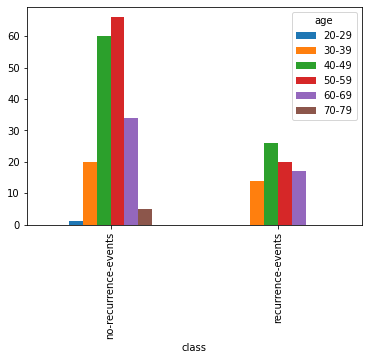

In [1095]:
%matplotlib inline
pd.crosstab(df['class'],df['age']).plot(kind='bar')

In [1096]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [1097]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        263 non-null    category
 1   age          263 non-null    object  
 2   menopause    263 non-null    category
 3   tumor-size   263 non-null    object  
 4   inv-nodes    263 non-null    object  
 5   node-caps    263 non-null    category
 6   deg-malig    263 non-null    category
 7   breast       263 non-null    category
 8   breast-quad  263 non-null    category
 9   irradiat     263 non-null    category
dtypes: category(7), object(3)
memory usage: 19.1+ KB


### Pre-Processing Of Varibles

In [1098]:
X = df[['class', 'age', 'menopause', 'irradiat','deg-malig','breast-quad','node-caps']].values

In [1099]:
X

array([['no-recurrence-events', '30-39', 'premeno', ..., 3, 'left_low',
        'no'],
       ['no-recurrence-events', '40-49', 'premeno', ..., 2, 'right_up',
        'no'],
       ['no-recurrence-events', '40-49', 'premeno', ..., 2, 'left_low',
        'no'],
       ...,
       ['recurrence-events', '60-69', 'ge40', ..., 1, 'left_up', 'no'],
       ['recurrence-events', '40-49', 'ge40', ..., 3, 'left_low', 'no'],
       ['recurrence-events', '50-59', 'ge40', ..., 3, 'left_low', 'no']],
      dtype=object)

In [1100]:
df['tumor-size'].value_counts()

30-34    57
25-29    48
20-24    45
10-14    26
15-19    25
40-44    21
35-39    18
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64

#### Pre Processing Categorical Features

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b></li>
    <li> <b> y </b> as the <b> response vector </b> </li>
</ul>


In [1101]:
from sklearn import preprocessing

In [1102]:
le_class = preprocessing.LabelEncoder()
le_class.fit(['no-recurrence-events','recurrence-events'])
X[:,0] = le_class.transform(X[:,0]) 

In [1103]:
X[:,0] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=object)

In [1104]:
# le_tumorSize = preprocessing.LabelEncoder()
# le_tumorSize.fit(['30-34','25-29','20-24','10-14','15-19','40-44','35-39','0-4','50-54','5-9','45-49'])
# X[:,7] = le_tumorSize.transform(X[:,7]) 

In [1105]:
le_age = preprocessing.LabelEncoder()
le_age.fit(['40-49','50-59','60-69','70-79','20-29','30-39'])
X[:,1] = le_age.transform(X[:,1]) 

In [1106]:
le_menopause = preprocessing.LabelEncoder()
le_menopause.fit(['premeno','ge40','lt40'])
X[:,2] = le_menopause.transform(X[:,2]) 

In [1107]:
le_irradiat = preprocessing.LabelEncoder()
le_irradiat.fit(['yes','no'])
X[:,3] = le_irradiat.transform(X[:,3]) 

In [1108]:
le_breast_quad = preprocessing.LabelEncoder()
le_breast_quad.fit(['central', 'left_low', 'left_up', 'right_low', 'right_up'])
X[:,5] = le_breast_quad.transform(X[:,5]) 

In [1109]:
le_nodeCap = preprocessing.LabelEncoder()
le_nodeCap.fit(['yes','no'])
X[:,6] = le_nodeCap.transform(X[:,6]) 

In [1110]:
le_deg = preprocessing.LabelEncoder()
le_deg.fit([0,1,2,3])
X[:,4] = le_deg.transform(X[:,4]) 

In [1111]:
X[0:5]

array([[0, 1, 2, 0, 3, 1, 0],
       [0, 2, 2, 0, 2, 4, 0],
       [0, 2, 2, 0, 2, 1, 0],
       [0, 4, 0, 0, 2, 2, 0],
       [0, 2, 2, 0, 2, 3, 0]], dtype=object)

### Response Matrix

In [1112]:
y = df["breast"]
y[0:5]

0     left
1    right
2     left
3    right
4    right
Name: breast, dtype: category
Categories (2, object): ['left', 'right']

### Model 1: Decision Tree

<hr>
<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [1113]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [1114]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [1115]:
breastTress = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
breastTress

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [1116]:
breastTress.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

In [1117]:
predTree = breastTress.predict(X_testset)

In [1118]:
print (predTree [0:5])


['right' 'left' 'right' 'left' 'right']


In [1119]:
print (y_testset [0:5])

282     left
39      left
149    right
201     left
106     left
Name: breast, dtype: category
Categories (2, object): ['left', 'right']


In [1120]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6582278481012658


### Visulization of the Tree

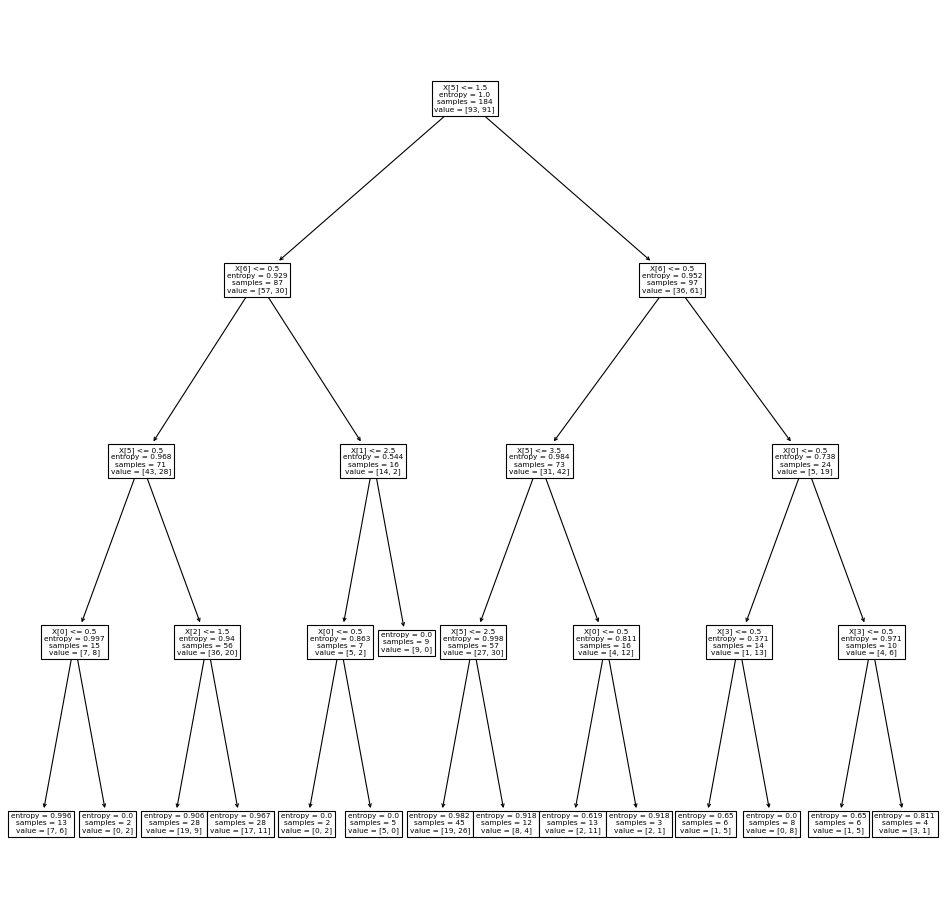

In [1121]:
import sklearn.tree as tree
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)
tree.plot_tree(breastTress)
plt.show()

### Model 2: Logistic  Regression

In [1122]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.64, -1.62,  0.91, -0.55,  1.28, -0.73, -0.51],
       [-0.64, -0.63,  0.91, -0.55, -0.09,  1.99, -0.51],
       [-0.64, -0.63,  0.91, -0.55, -0.09, -0.73, -0.51],
       [-0.64,  1.35, -1.12, -0.55, -0.09,  0.18, -0.51],
       [-0.64, -0.63,  0.91, -0.55, -0.09,  1.09, -0.51]])

In [1123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (210, 7) (210,)
Test set: (53, 7) (53,)


### Applying Logistic Regression Model with K Fold Cross Validation

In [1124]:
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , X, y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.5092162554426706


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb37da4bb50>)

<Figure size 432x288 with 0 Axes>

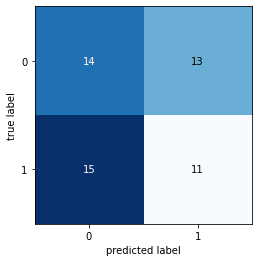

In [1125]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['left','right'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat=cnf_matrix)

In [1126]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

        left       0.48      0.52      0.50        27
       right       0.46      0.42      0.44        26

    accuracy                           0.47        53
   macro avg       0.47      0.47      0.47        53
weighted avg       0.47      0.47      0.47        53



*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

### Model 3: KNN

In [1127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        263 non-null    category
 1   age          263 non-null    object  
 2   menopause    263 non-null    category
 3   tumor-size   263 non-null    object  
 4   inv-nodes    263 non-null    object  
 5   node-caps    263 non-null    category
 6   deg-malig    263 non-null    category
 7   breast       263 non-null    category
 8   breast-quad  263 non-null    category
 9   irradiat     263 non-null    category
dtypes: category(7), object(3)
memory usage: 19.1+ KB


In [1128]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.64, -1.62,  0.91, -0.55,  1.28, -0.73, -0.51],
       [-0.64, -0.63,  0.91, -0.55, -0.09,  1.99, -0.51],
       [-0.64, -0.63,  0.91, -0.55, -0.09, -0.73, -0.51],
       [-0.64,  1.35, -1.12, -0.55, -0.09,  0.18, -0.51],
       [-0.64, -0.63,  0.91, -0.55, -0.09,  1.09, -0.51]])

In [1129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (210, 7) (210,)
Test set: (53, 7) (53,)


In [1130]:
from sklearn.neighbors import KNeighborsClassifier

### Applying K fold cross validation

In [1131]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [1132]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['left', 'left', 'left', 'left', 'left'], dtype=object)

In [1133]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.58, 0.57, 0.58, 0.51, 0.53, 0.51, 0.53, 0.47, 0.47])

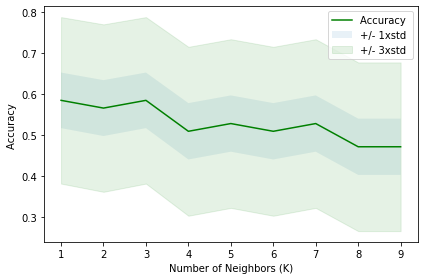

In [1134]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [1135]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5849056603773585 with k= 1
